In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/IW2_LIACC

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1zeSTEyXHEybPFlD6lBhfLhXgf0Phc8qC/IW2_LIACC


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
import re 
import datetime

## Dataset

In [4]:
def get_dataset (users_list = ['1'],
                               #'9', '8', '7', '3', '4', '5', '2', '6', '10', '11', '12', '1'],
                 folders_list = ['DatasetA'],
                 path = '/content/drive/MyDrive/IW2_LIACC/IW_NeuroSky/'):

  '''
  to prepaire the dataset.

  users = list of users like [1,2,3,7]
  series = list of dataset names like ['DatasetA', 'DatasetB']

  '''


  data = pd.DataFrame()
  data_labels = pd.DataFrame()

  for folder_name in folders_list:

    _, dirs, _ = next(os.walk(path+folder_name))

    existed_files = set(dirs) & set(users_list)

    labels = pd.read_csv(path+folder_name+'/Labels.csv')
    labels.set_index (['File'], inplace=True)

    for user_name in existed_files:
      
      temp = path + folder_name + '/' + user_name
      _, _, files = next(os.walk(temp))

      if len (files) == 0:
        continue

      for file_name in files:

        temp = path + folder_name + '/' + user_name + '/' + file_name

        #print (temp)

        data_single_file = pd.read_csv(temp)

        label_single_file = pd.DataFrame({'label': [labels['Label'][file_name]]*data_single_file.shape[0]})
        
        data_file = pd.concat([data_single_file, label_single_file], axis =1)

        #data_single_file.concat(label_single_file, axis=1, inplace = True)

        data = data.append (data_file)
        

  return data

In [5]:
data = get_dataset (users_list = ['1'],
                                 #'9', '8', '7', '3', '4', '5', '2', '6', '10', '11', '12', '1'],
                                 folders_list = ['DatasetA'],
                                 path = '/content/drive/MyDrive/IW2_LIACC/IW_NeuroSky/')

In [6]:
data

,time,rawEEG,Blink,Attention,Meditation,delta,high-alpha,high-beta,low-alpha,low-beta,low-gamma,mid-gamma,theta,label
0,15:29:27,24,0,60,83,9114,6856,6290,3214,11727,4341,16387,8362,Left
1,15:29:27,24,0,60,83,9114,6856,6290,3214,11727,4341,16387,8362,Left
2,15:29:27,24,0,60,83,9114,6856,6290,3214,11727,4341,16387,8362,Left
3,15:29:27,24,0,60,83,9114,6856,6290,3214,11727,4341,16387,8362,Left
4,15:29:27,24,0,60,83,9114,6856,6290,3214,11727,4341,16387,8362,Left
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191435,15:30:06,61,0,74,70,13916,6005,11900,7339,5709,3354,9460,11352,Stop
191436,15:30:06,61,0,74,70,13916,6005,11900,7339,5709,3354,9460,11352,Stop
191437,15:30:06,61,0,74,70,13916,6005,11900,7339,5709,3354,9460,11352,Stop
191438,15:30:06,61,0,74,70,13916,6005,11900,7339,5709,3354,9460,11352,Stop


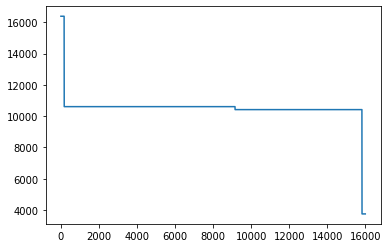

In [8]:
plt.plot (data['mid-gamma'].iloc[0:16000])

In [ ]:
#data.to_csv('./data_a_to_c_all_users.csv',index=False)

In [ ]:
#data = pd.read_csv('data_a_to_c_all_users.csv')

## models for 99% accuracy 
- all data in the model 


In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
label_mapping = {'Front':0, 'Stop':3, 'Right':1, 'Left':2 }

def preprocess_inputs(df):
    df = df.copy()
    
    df['label'] = df['label'].replace(label_mapping)
    
    y = df['label'].copy()
    X = df.drop('label', axis=1).copy()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
    
    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = preprocess_inputs(data.drop(['time', 'Blink'], axis=1))

In [ ]:
X_train

,rawEEG,Attention,Meditation,delta,high-alpha,high-beta,low-alpha,low-beta,low-gamma,mid-gamma,theta
4342805,48,57,69,36153,14790,8041,10034,24362,1753,1042,23010
14600484,13,77,67,12180,6046,46220,10258,14490,12981,5334,13456
2288962,70,61,96,12352,5259,7092,2376,11669,3681,14998,6907
14130786,56,66,80,26284,17847,11725,19302,8663,5533,2126,17985
1441530,58,69,56,3065,18787,11783,10581,10846,10959,7427,18507
...,...,...,...,...,...,...,...,...,...,...,...
1241052,41,81,35,192801,22999,20749,1938,7819,5788,11365,27834
11552066,68,50,35,18280,1299,1036,2133,2082,1173,492,11347
4222334,66,37,75,27803,13451,7173,22329,5179,7796,1853,13692
8666477,105,69,64,4759,4126,4588,5706,4196,1760,1186,7880


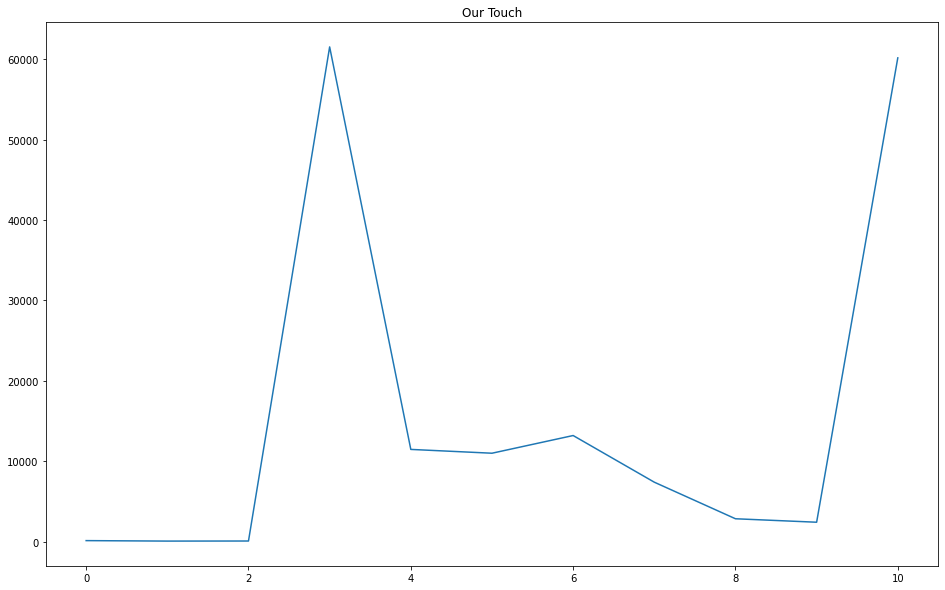

In [ ]:
sample = X_train.loc[0]

plt.figure(figsize=(16, 10))
plt.plot(range(len(sample)), sample)
plt.title("Our Touch")
plt.show()

# so may normalize the dataset 

In [ ]:
tf.keras.layers.Conv1D(32, 3, activation='relu',input_shape=input_shape[1:])(x)


In [ ]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))

expand_dims = tf.expand_dims(inputs, axis=2)

gru = tf.keras.layers.LSTM(256, return_sequences=True)(expand_dims)
gru2 = tf.keras.layers.LSTM(256, return_sequences=True)(gru)

flatten = tf.keras.layers.Flatten()(gru2)

outputs = tf.keras.layers.Dense(4, activation='softmax')(flatten)


model = tf.keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 11)]              0         
                                                                 
 tf.expand_dims_1 (TFOpLambd  (None, 11, 1)            0         
 a)                                                              
                                                                 
 lstm_2 (LSTM)               (None, 11, 256)           264192    
                                                                 
 lstm_3 (LSTM)               (None, 11, 256)           525312    
                                                                 
 flatten_1 (Flatten)         (None, 2816)              0         
                                                                 
 dense (Dense)               (None, 4)                 11268     
                                                             

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.05,
    batch_size=512,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/50
20120/20120 [==============================] - 261s 13ms/step - loss: 0.1163 - accuracy: 0.9534 - val_loss: 0.0285 - val_accuracy: 0.9909
Epoch 2/50
20120/20120 [==============================] - 258s 13ms/step - loss: 0.0161 - accuracy: 0.9958 - val_loss: 0.0382 - val_accuracy: 0.9871
Epoch 3/50
20120/20120 [==============================] - 253s 13ms/step - loss: 0.0121 - accuracy: 0.9970 - val_loss: 0.0071 - val_accuracy: 0.9977
Epoch 4/50
20120/20120 [==============================] - 252s 13ms/step - loss: 0.0109 - accuracy: 0.9973 - val_loss: 0.0102 - val_accuracy: 0.9978
Epoch 5/50
20120/20120 [==============================] - 252s 13ms/step - loss: 0.0104 - accuracy: 0.9974 - val_loss: 0.0187 - val_accuracy: 0.9967
Epoch 6/50
20120/20120 [==============================] - 257s 13ms/step - loss: 0.0095 - accuracy: 0.9977 - val_loss: 0.0103 - val_accuracy: 0.9963
Epoch 7/50
20120/20120 [==============================] - 251s 12ms/step - loss: 0.0098 - accuracy: 0.9976

In [ ]:
model_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

Test Accuracy: 99.887%


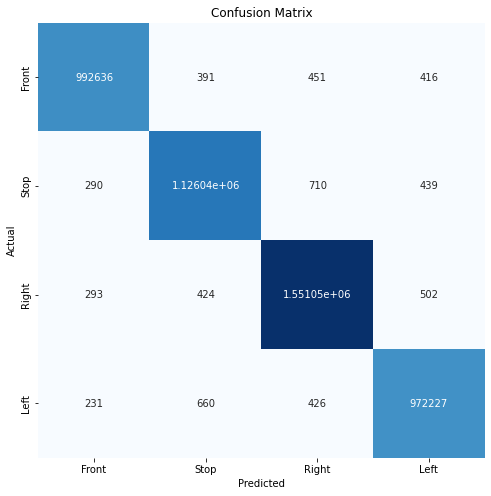

Classification Report:
----------------------
               precision    recall  f1-score   support

       Front       1.00      1.00      1.00    993894
        Stop       1.00      1.00      1.00   1127475
       Right       1.00      1.00      1.00   1552271
        Left       1.00      1.00      1.00    973544

    accuracy                           1.00   4647184
   macro avg       1.00      1.00      1.00   4647184
weighted avg       1.00      1.00      1.00   4647184



In [ ]:
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(4) + 0.5, label_mapping.keys())
plt.yticks(np.arange(4) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)



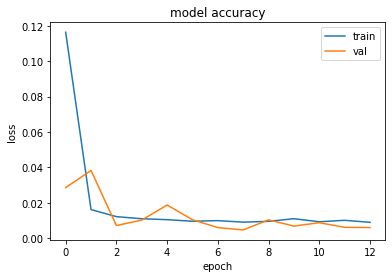

In [ ]:
import keras
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()